In [1]:
!pip install geopandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dsput\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install contextily


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dsput\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install plotly.expresS


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dsput\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
!pip install --upgrade nbformat


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dsput\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# TP Análisis de datos - Parte 1

#### Integrantes:
* Daniela Putrino
* Dimas Torres

El objetivo de este trabajo es realizar un **análisis exploratorio de datos (EDA)** completo sobre un conjunto de registros extraidos de la web del Servicio Meteorológico Nacional (SMN) Argentino.

El dataset se conforma con dos archivos descargados y unidos convenientemente:
1. DatoHorario: consta de valores por hora para las *features*
    * Temperatura (TEMP)
    * Humedad (HUM)
    * Presión Normal Media (PNM)    
    * DD
    * FF
3. EstacionesSMN: información sobre la localización de las distintas estaciones meteorológicas (latitud, longitud, altitud y provincia).

In [5]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx

In [6]:
# Definimos la ruta de los datos
path = "SMN_data/"
# Cargamos el archivo de datos horarios
# Debemos utilizar el función read_fwf para leer archivos de ancho fijo, separando por tabulaciones
# Omitimos las dos primeras filas y definimos los nombres de las columnas, con sus respectivas unidades.
# Definimos el encoding como 'latin1' para evitar problemas con caracteres especiales.
df_hor = pd.read_fwf(path+"datohorario20250715.txt", encoding='latin1', sep='\t', skiprows=2, names=["FECHA (ddmmyyyy)", "HORA", "TEMP (°C)", "HUM (%)", "PNM (hPa)", "DD (g)", "FF (km/h)", "ESTACION"])

df_hor.head()  # Mostramos las primeras filas del DataFrame para verificar que se ha cargado correctamente

,FECHA (ddmmyyyy),HORA,TEMP (°C),HUM (%),PNM (hPa),DD (g),FF (km/h),ESTACION
0,15072025.0,0.0,13.7,88.0,1020.2,80.0,13.0,AEROPARQUE AERO
1,15072025.0,1.0,13.6,91.0,1019.6,80.0,11.0,AEROPARQUE AERO
2,15072025.0,2.0,13.4,91.0,1019.3,80.0,11.0,AEROPARQUE AERO
3,15072025.0,3.0,13.4,94.0,1018.7,80.0,13.0,AEROPARQUE AERO
4,15072025.0,4.0,13.7,91.0,1018.2,90.0,9.0,AEROPARQUE AERO


In [7]:
# Analizamos los tipos de datos
df_hor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FECHA (ddmmyyyy)  2035 non-null   float64
 1   HORA              2035 non-null   float64
 2   TEMP (°C)         2035 non-null   float64
 3   HUM (%)           2035 non-null   float64
 4   PNM (hPa)         1828 non-null   float64
 5   DD (g)            2034 non-null   float64
 6   FF (km/h)         2034 non-null   float64
 7   ESTACION          2074 non-null   object 
dtypes: float64(7), object(1)
memory usage: 129.8+ KB


In [8]:
# Convertimos las columnas a los tipos de datos adecuados
# OBS: Necesitamos convertir los datos a tipos que soporten valores nulos; se identifican con mayúscula inicial
df_hor['FECHA (ddmmyyyy)'] = pd.to_datetime(df_hor['FECHA (ddmmyyyy)'], format='%d%m%Y') # Convertir a tipo fecha, aunque no tiene sentido ya que no utilizaremos esta columna por tener un único valor; son todos datos del mismo día.
df_hor["HORA"] = df_hor["HORA"].astype("Int64")
df_hor["TEMP (°C)"] = df_hor["TEMP (°C)"].astype("Float64")
df_hor["HUM (%)"] = df_hor["HUM (%)"].astype("Int64")
df_hor["DD (g)"] = df_hor["DD (g)"].astype("Int64")
df_hor["FF (km/h)"] = df_hor["FF (km/h)"].astype("Int64")

df_hor.info()  # Verificamos que los tipos de datos se han actualizado correctamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA (ddmmyyyy)  2035 non-null   datetime64[ns]
 1   HORA              2035 non-null   Int64         
 2   TEMP (°C)         2035 non-null   Float64       
 3   HUM (%)           2035 non-null   Int64         
 4   PNM (hPa)         1828 non-null   float64       
 5   DD (g)            2034 non-null   Int64         
 6   FF (km/h)         2034 non-null   Int64         
 7   ESTACION          2074 non-null   object        
dtypes: Float64(1), Int64(4), datetime64[ns](1), float64(1), object(1)
memory usage: 139.9+ KB


In [9]:
df_hor.head()  # Mostramos nuevamente las primeras filas para ver los cambios realizados

,FECHA (ddmmyyyy),HORA,TEMP (°C),HUM (%),PNM (hPa),DD (g),FF (km/h),ESTACION
0,2025-07-15,0,13.7,88,1020.2,80,13,AEROPARQUE AERO
1,2025-07-15,1,13.6,91,1019.6,80,11,AEROPARQUE AERO
2,2025-07-15,2,13.4,91,1019.3,80,11,AEROPARQUE AERO
3,2025-07-15,3,13.4,94,1018.7,80,13,AEROPARQUE AERO
4,2025-07-15,4,13.7,91,1018.2,90,9,AEROPARQUE AERO


In [10]:
df_hor.groupby("ESTACION")["TEMP (°C)"].agg(["min", "max", "mean"])  # Verificamos la cantidad de datos por estación

,min,max,mean
ESTACION,,,
AEROPARQUE AERO,13.4,17.2,15.2375
AZUL AERO,8.8,13.6,10.9875
BAHIA BLANCA AERO,9.6,16.7,12.625
BARILOCHE AERO,3.1,8.4,4.654167
BASE BELGRANO II,-18.3,-16.8,-17.55
...,...,...,...
VIEDMA AERO,6.2,15.5,10.7
VILLA DE MARIA DE,9.5,28.4,18.994444
VILLA DOLORES AER,11.6,24.8,17.879167


In [11]:
df_est = pd.read_fwf(path+"estaciones_smn.txt", encoding='latin1', sep='\t', skiprows=2, names=["ESTACION", "PROVINCIA", "LAT_GRAD", "LAT_MIN", "LON_GRAD", "LON_MIN", "ALTURA", "NUM", "NroOACI"])
df_est

,ESTACION,PROVINCIA,LAT_GRAD,LAT_MIN,LON_GRAD,LON_MIN,ALTURA,NUM,NroOACI
0,BASE BELGRANO II,ANTARTIDA,-77.0,52.0,-34.0,37.0,256.0,89034.0,SAYB
1,BASE CARLINI (EX JUBANY),ANTARTIDA,-62.0,14.0,-58.0,39.0,11.0,89053.0,SAYJ
2,BASE ESPERANZA,ANTARTIDA,-63.0,23.0,-56.0,59.0,24.0,88963.0,SAYE
3,BASE MARAMBIO,ANTARTIDA,-64.0,14.0,-56.0,37.0,198.0,89055.0,SAWB
4,BASE ORCADAS,ANTARTIDA,-60.0,44.0,-44.0,44.0,12.0,88968.0,SAYO
...,...,...,...,...,...,...,...,...,...
115,SANTIAGO DEL ESTERO AERO,SANTIAGO DEL ES,-27.0,45.0,-64.0,17.0,199.0,87129.0,SANE
116,TERMAS DE RIO HONDO AERO,SANTIAGO DEL ES,-27.0,30.0,-64.0,56.0,280.0,87127.0,SANR
117,RIO GRANDE B.A.,TIERRA DEL FUEG,-53.0,46.0,-67.0,45.0,22.0,87934.0,SAWE
118,USHUAIA AERO,TIERRA DEL FUEG,-54.0,50.0,-68.0,18.0,57.0,87938.0,SAWH


In [12]:
# Aplicamos la fórmula y multiplicamos por -1 para ajustar al hemisferio correcto.
df_est['LAT'] = (df_est['LAT_GRAD'] - df_est['LAT_MIN'] / 60)
df_est['LON'] = (df_est['LON_GRAD'] - df_est['LON_MIN'] / 60)

In [13]:
df_est

,ESTACION,PROVINCIA,LAT_GRAD,LAT_MIN,LON_GRAD,LON_MIN,ALTURA,NUM,NroOACI,LAT,LON
0,BASE BELGRANO II,ANTARTIDA,-77.0,52.0,-34.0,37.0,256.0,89034.0,SAYB,-77.866667,-34.616667
1,BASE CARLINI (EX JUBANY),ANTARTIDA,-62.0,14.0,-58.0,39.0,11.0,89053.0,SAYJ,-62.233333,-58.650000
2,BASE ESPERANZA,ANTARTIDA,-63.0,23.0,-56.0,59.0,24.0,88963.0,SAYE,-63.383333,-56.983333
3,BASE MARAMBIO,ANTARTIDA,-64.0,14.0,-56.0,37.0,198.0,89055.0,SAWB,-64.233333,-56.616667
4,BASE ORCADAS,ANTARTIDA,-60.0,44.0,-44.0,44.0,12.0,88968.0,SAYO,-60.733333,-44.733333
...,...,...,...,...,...,...,...,...,...,...,...
115,SANTIAGO DEL ESTERO AERO,SANTIAGO DEL ES,-27.0,45.0,-64.0,17.0,199.0,87129.0,SANE,-27.750000,-64.283333
116,TERMAS DE RIO HONDO AERO,SANTIAGO DEL ES,-27.0,30.0,-64.0,56.0,280.0,87127.0,SANR,-27.500000,-64.933333
117,RIO GRANDE B.A.,TIERRA DEL FUEG,-53.0,46.0,-67.0,45.0,22.0,87934.0,SAWE,-53.766667,-67.750000
118,USHUAIA AERO,TIERRA DEL FUEG,-54.0,50.0,-68.0,18.0,57.0,87938.0,SAWH,-54.833333,-68.300000


In [33]:
df_combinado = pd.merge(df_hor, df_est, on='ESTACION', how='outer')
df_combinado

,FECHA (ddmmyyyy),HORA,TEMP (°C),HUM (%),PNM (hPa),DD (g),FF (km/h),ESTACION,PROVINCIA,LAT_GRAD,LAT_MIN,LON_GRAD,LON_MIN,ALTURA,NUM,NroOACI,LAT,LON
0,2025-07-15,0,13.7,88,1020.2,80,13,AEROPARQUE AERO,CAPITAL FEDERAL,-34.0,33.0,-58.0,25.0,6.0,87582.0,SABE,-34.550000,-58.416667
1,2025-07-15,1,13.6,91,1019.6,80,11,AEROPARQUE AERO,CAPITAL FEDERAL,-34.0,33.0,-58.0,25.0,6.0,87582.0,SABE,-34.550000,-58.416667
2,2025-07-15,2,13.4,91,1019.3,80,11,AEROPARQUE AERO,CAPITAL FEDERAL,-34.0,33.0,-58.0,25.0,6.0,87582.0,SABE,-34.550000,-58.416667
3,2025-07-15,3,13.4,94,1018.7,80,13,AEROPARQUE AERO,CAPITAL FEDERAL,-34.0,33.0,-58.0,25.0,6.0,87582.0,SABE,-34.550000,-58.416667
4,2025-07-15,4,13.7,91,1018.2,90,9,AEROPARQUE AERO,CAPITAL FEDERAL,-34.0,33.0,-58.0,25.0,6.0,87582.0,SABE,-34.550000,-58.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,2025-07-15,20,14.8,83,1015.8,180,19,VILLA REYNOLDS AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,2025-07-15,21,14.0,89,1016.4,180,17,VILLA REYNOLDS AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,2025-07-15,22,11.6,96,1017.9,140,41,VILLA REYNOLDS AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,2025-07-15,23,7.4,88,1021.3,180,19,VILLA REYNOLDS AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_ok = df_combinado.drop(columns=["FECHA (ddmmyyyy)", "ESTACION", "LAT_GRAD", "LAT_MIN", "LON_GRAD", "LON_MIN", "NUM", "NroOACI"])
df_ok

,HORA,TEMP (°C),HUM (%),PNM (hPa),DD (g),FF (km/h),PROVINCIA,ALTURA,LAT,LON
0,0,13.7,88,1020.2,80,13,CAPITAL FEDERAL,6.0,-34.550000,-58.416667
1,1,13.6,91,1019.6,80,11,CAPITAL FEDERAL,6.0,-34.550000,-58.416667
2,2,13.4,91,1019.3,80,11,CAPITAL FEDERAL,6.0,-34.550000,-58.416667
3,3,13.4,94,1018.7,80,13,CAPITAL FEDERAL,6.0,-34.550000,-58.416667
4,4,13.7,91,1018.2,90,9,CAPITAL FEDERAL,6.0,-34.550000,-58.416667
...,...,...,...,...,...,...,...,...,...,...
2099,20,14.8,83,1015.8,180,19,NaN,NaN,NaN,NaN
2100,21,14.0,89,1016.4,180,17,NaN,NaN,NaN,NaN
2101,22,11.6,96,1017.9,140,41,NaN,NaN,NaN,NaN
2102,23,7.4,88,1021.3,180,19,NaN,NaN,NaN,NaN


In [35]:
# Creamos características para la hora que entienden los ciclos diarios
df_ok['HORA_sen'] = np.sin(2 * np.pi * df_ok['HORA']/24.0)
df_ok['HORA_cos'] = np.cos(2 * np.pi * df_ok['HORA']/24.0)

In [36]:
df_ok.drop("HORA", axis=1, inplace=True)  # Eliminamos la columna HORA original, ya que no la utilizaremos

In [37]:
df_ok = pd.get_dummies(df_ok, columns=['PROVINCIA'], prefix='PROV', drop_first=True)  # Convertimos la columna PROVINCIA en variables dummy, eliminando la primera para evitar la trampa de la variable ficticia

In [38]:
df_ok

,TEMP (°C),HUM (%),PNM (hPa),DD (g),FF (km/h),ALTURA,LAT,LON,HORA_sen,HORA_cos,...,PROV_NEUQUEN,PROV_RIO NEGRO,PROV_SALTA,PROV_SAN JUAN,PROV_SAN LUIS,PROV_SANTA CRUZ,PROV_SANTA FE,PROV_SANTIAGO DEL ES,PROV_TIERRA DEL FUEG,PROV_TUCUMAN
0,13.7,88,1020.2,80,13,6.0,-34.550000,-58.416667,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,13.6,91,1019.6,80,11,6.0,-34.550000,-58.416667,0.258819,0.965926,...,False,False,False,False,False,False,False,False,False,False
2,13.4,91,1019.3,80,11,6.0,-34.550000,-58.416667,0.5,0.866025,...,False,False,False,False,False,False,False,False,False,False
3,13.4,94,1018.7,80,13,6.0,-34.550000,-58.416667,0.707107,0.707107,...,False,False,False,False,False,False,False,False,False,False
4,13.7,91,1018.2,90,9,6.0,-34.550000,-58.416667,0.866025,0.5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,14.8,83,1015.8,180,19,NaN,NaN,NaN,-0.866025,0.5,...,False,False,False,False,False,False,False,False,False,False
2100,14.0,89,1016.4,180,17,NaN,NaN,NaN,-0.707107,0.707107,...,False,False,False,False,False,False,False,False,False,False
2101,11.6,96,1017.9,140,41,NaN,NaN,NaN,-0.5,0.866025,...,False,False,False,False,False,False,False,False,False,False
2102,7.4,88,1021.3,180,19,NaN,NaN,NaN,-0.258819,0.965926,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df_ok.dropna(inplace=True)  # Eliminamos filas con valores nulos
df_ok.reset_index(drop=True, inplace=True)  # Reseteamos el índice del Data

In [44]:
# Nuestro objetivo
y = df_ok['TEMP (°C)']

# Nuestras características. Eliminamos las columnas que no aportan o son redundantes.
X = df_ok.drop(columns=['TEMP (°C)'])

In [45]:
X

,HUM (%),PNM (hPa),DD (g),FF (km/h),ALTURA,LAT,LON,HORA_sen,HORA_cos,PROV_BUENOS AIRES,...,PROV_NEUQUEN,PROV_RIO NEGRO,PROV_SALTA,PROV_SAN JUAN,PROV_SAN LUIS,PROV_SANTA CRUZ,PROV_SANTA FE,PROV_SANTIAGO DEL ES,PROV_TIERRA DEL FUEG,PROV_TUCUMAN
0,88,1020.2,80,13,6.0,-34.550000,-58.416667,0.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
1,91,1019.6,80,11,6.0,-34.550000,-58.416667,0.258819,0.965926,False,...,False,False,False,False,False,False,False,False,False,False
2,91,1019.3,80,11,6.0,-34.550000,-58.416667,0.5,0.866025,False,...,False,False,False,False,False,False,False,False,False,False
3,94,1018.7,80,13,6.0,-34.550000,-58.416667,0.707107,0.707107,False,...,False,False,False,False,False,False,False,False,False,False
4,91,1018.2,90,9,6.0,-34.550000,-58.416667,0.866025,0.5,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,94,1013.9,20,11,9.0,-37.233333,-57.016667,-0.965926,-0.258819,True,...,False,False,False,False,False,False,False,False,False,False
1352,95,1013.9,360,4,9.0,-37.233333,-57.016667,-1.0,-0.0,True,...,False,False,False,False,False,False,False,False,False,False
1353,97,1013.4,360,4,9.0,-37.233333,-57.016667,-0.965926,0.258819,True,...,False,False,False,False,False,False,False,False,False,False
1354,99,1013.2,20,7,9.0,-37.233333,-57.016667,-0.866025,0.5,True,...,False,False,False,False,False,False,False,False,False,False


In [46]:
from sklearn.model_selection import train_test_split

# Dividimos los datos: 80% para entrenar, 20% para probar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Creamos el modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
from sklearn.metrics import mean_absolute_error, r2_score

# Hacemos las predicciones sobre el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calculamos las métricas de error
mae = mean_absolute_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f"Error Absoluto Medio (MAE): {mae:.2f}°C")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Error Absoluto Medio (MAE): 0.76°C
Coeficiente de Determinación (R²): 0.98


In [49]:
# Asumiendo que ya tienes 'y_test' y 'predicciones' del paso anterior

# Creamos un nuevo DataFrame para la comparación
# y_test ya tiene el índice correcto, pandas alineará las predicciones automáticamente
df_resultados = pd.DataFrame({
    'TEMP_Real': y_test,
    'TEMP_Predicha': predicciones
})

# Opcional: añadimos una columna con la diferencia o error
df_resultados['Error'] = df_resultados['TEMP_Real'] - df_resultados['TEMP_Predicha']

# Mostramos las primeras filas del nuevo DataFrame
print("--- DataFrame de Comparación: Real vs. Predicción ---")
print(df_resultados.head(10))

--- DataFrame de Comparación: Real vs. Predicción ---
      TEMP_Real  TEMP_Predicha  Error
49         10.0         11.048 -1.048
898        16.7         16.729 -0.029
1316       13.5         11.532  1.968
363        13.8         13.370   0.43
925        10.8         11.292 -0.492
415        16.0         16.786 -0.786
566        15.4         15.442 -0.042
1242        9.0          7.472  1.528
974         1.7          1.853 -0.153
1013       19.2         19.364 -0.164


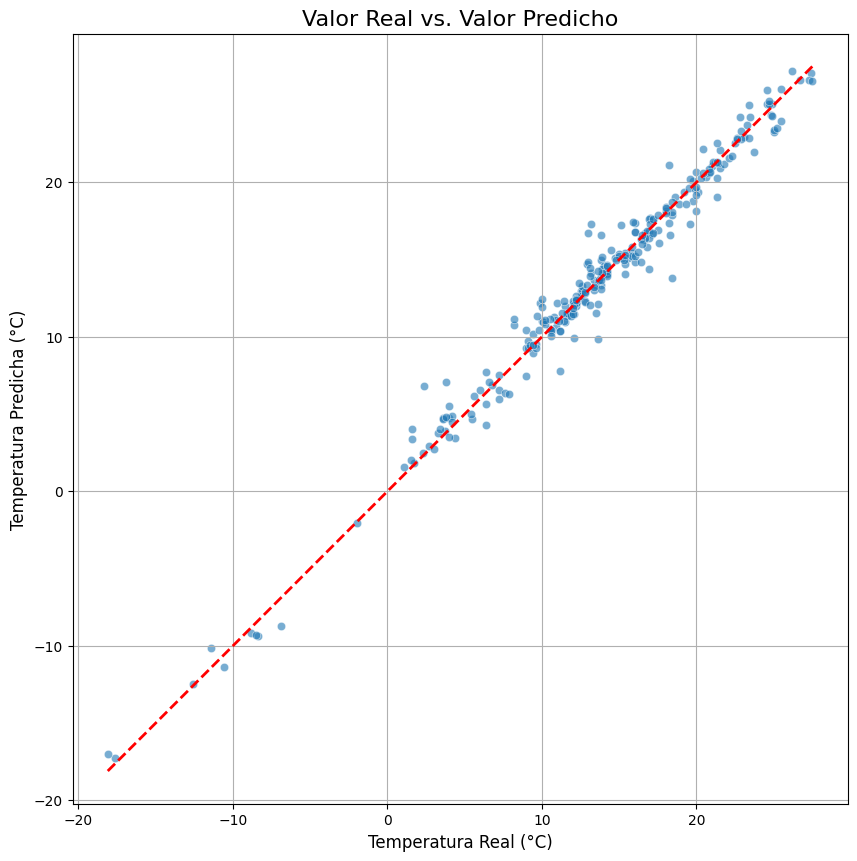

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

# Graficamos los puntos
sns.scatterplot(x='TEMP_Real', y='TEMP_Predicha', data=df_resultados, alpha=0.6)

# Dibujamos la línea de referencia para un "modelo perfecto"
plt.plot([df_resultados['TEMP_Real'].min(), df_resultados['TEMP_Real'].max()],
         [df_resultados['TEMP_Real'].min(), df_resultados['TEMP_Real'].max()],
         '--r', linewidth=2)

plt.title('Valor Real vs. Valor Predicho', fontsize=16)
plt.xlabel('Temperatura Real (°C)', fontsize=12)
plt.ylabel('Temperatura Predicha (°C)', fontsize=12)
plt.axis('equal') # Asegura que la escala de los ejes sea la misma
plt.grid(True)
plt.show()

In [53]:
# Partimos de 'df_resultados' y 'X_test' que ya teníamos.
# 'df_resultados' tiene el error y comparte el índice con 'X_test'.

# Para obtener las coordenadas y el nombre, usamos el índice de X_test
# para buscar en el DataFrame que tenía todo junto ('df_final').
df_errores = df_ok.loc[X_test.index].copy()

# Añadimos las columnas de predicción y error que ya calculamos
df_errores['TEMP_Predicha'] = df_resultados['TEMP_Predicha']
df_errores['Error'] = df_resultados['Error']

# Creamos una columna con el error absoluto para usarla en el tamaño de la burbuja
df_errores['Error_Absoluto'] = np.abs(df_errores['Error'])

print("--- DataFrame listo para el mapa de errores ---")
print(df_errores.head())

--- DataFrame listo para el mapa de errores ---
      TEMP (°C)  HUM (%)  PNM (hPa)  DD (g)  FF (km/h)  ALTURA        LAT  \
49         10.0       92     1016.2      10         15    83.0 -38.700000   
898        16.7       82     1015.4      70          9    52.0 -27.433333   
1316       13.5      100     1014.0     230          9   312.0 -36.216667   
363        13.8       92     1017.0      50          7    12.0 -34.600000   
925        10.8       99     1013.5     290          6   421.0 -33.083333   

            LON  HORA_sen  HORA_cos  ...  PROV_SAN JUAN  PROV_SAN LUIS  \
49   -62.150000  0.258819  0.965926  ...          False          False   
898  -59.033333       1.0       0.0  ...          False          False   
1316 -65.433333 -0.707107 -0.707107  ...          False          False   
363  -58.600000  0.965926 -0.258819  ...          False          False   
925  -64.266667  0.707107 -0.707107  ...          False          False   

      PROV_SANTA CRUZ  PROV_SANTA FE  PROV_S

In [65]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_errores,
    lat="LAT",
    lon="LON",
    color="Error_Absoluto",
    hover_data={'TEMP (°C)': ':.2f', 'TEMP_Predicha': ':.2f', 'Error': ':.2f'},
    color_continuous_scale=px.colors.diverging.RdBu_r, # Rojo para error positivo, Azul para negativo
    mapbox_style="open-street-map",
    zoom=3,
    center={"lat": -40, "lon": -64},
    title="Mapa de Errores de Predicción de Temperatura"
)

fig.update_traces(marker=dict(size=12))
fig.show()

C:\Users\dsput\AppData\Local\Temp\ipykernel_16496\595924369.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/




--- GeoDataFrame Creado (primeras filas) ---
  FECHA (ddmmyyyy)  HORA  TEMP (°C)  HUM (%)  PNM (hPa)  DD (g)  FF (km/h)  \
0       2025-07-15     0       13.7       88     1020.2      80         13   
1       2025-07-15     1       13.6       91     1019.6      80         11   
2       2025-07-15     2       13.4       91     1019.3      80         11   
3       2025-07-15     3       13.4       94     1018.7      80         13   
4       2025-07-15     4       13.7       91     1018.2      90          9   

          ESTACION        PROVINCIA  LAT_GRAD  LAT_MIN  LON_GRAD  LON_MIN  \
0  AEROPARQUE AERO  CAPITAL FEDERAL     -34.0     33.0     -58.0     25.0   
1  AEROPARQUE AERO  CAPITAL FEDERAL     -34.0     33.0     -58.0     25.0   
2  AEROPARQUE AERO  CAPITAL FEDERAL     -34.0     33.0     -58.0     25.0   
3  AEROPARQUE AERO  CAPITAL FEDERAL     -34.0     33.0     -58.0     25.0   
4  AEROPARQUE AERO  CAPITAL FEDERAL     -34.0     33.0     -58.0     25.0   

   ALTURA      NUM Nro

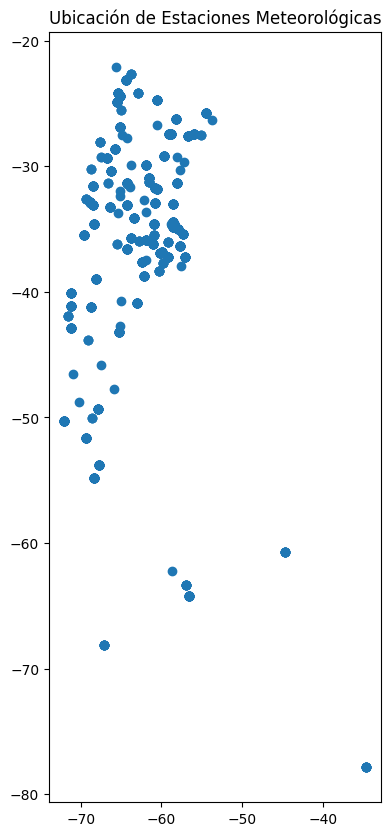

In [15]:
# Creamos el GeoDataFrame a partir del DataFrame combinado
# Especificamos que la geometría se crea a partir de las columnas 'lon' y 'lat'
gdf = gpd.GeoDataFrame(
    df_combinado,
    geometry=gpd.points_from_xy(df_combinado.LON, df_combinado.LAT),
    crs="EPSG:4326"  # CRS estándar para coordenadas lat/lon
)

print("\n--- GeoDataFrame Creado (primeras filas) ---")
print(gdf.head())

# Puedes hacer una visualización rápida para confirmar que funciona
print("\nVisualizando las estaciones en un mapa...")
gdf.plot(figsize=(10, 10))
plt.title("Ubicación de Estaciones Meteorológicas")
plt.show()

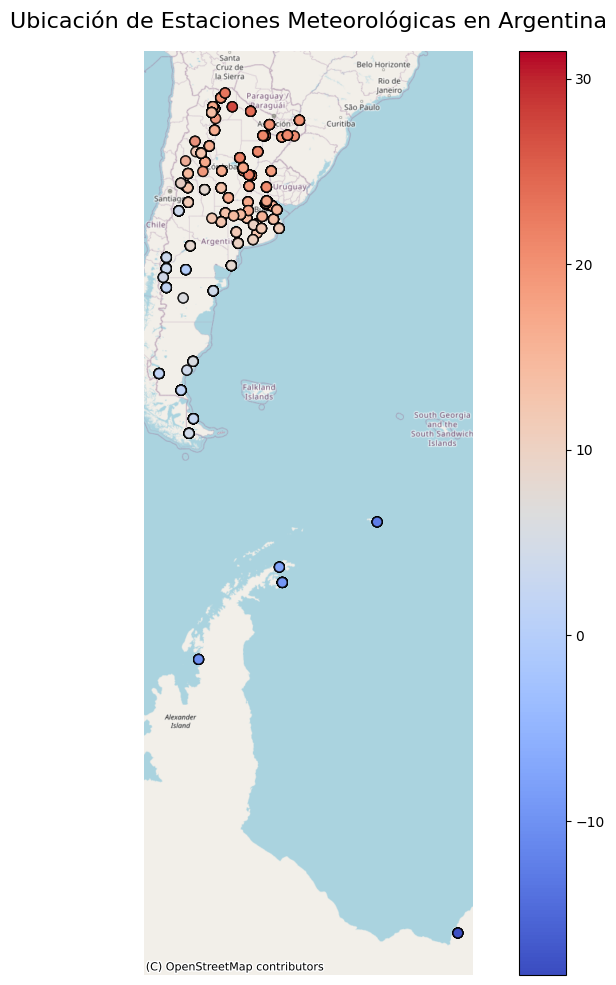

In [16]:
# 1. Reproyectar el GeoDataFrame al sistema de coordenadas de Web Mercator
gdf_wm = gdf.to_crs(epsg=3857)

# 2. Crear el gráfico de los puntos
fig, ax = plt.subplots(figsize=(12, 12))
gdf_wm.plot(ax=ax,
            column='TEMP (°C)',  # Columna para colorear los puntos por provincia
            cmap='coolwarm',  # Mapa de colores
            edgecolor='black',
            alpha=0.7,
            markersize=50,
            legend=True)

# 3. Añadir el mapa de fondo usando contextily
# Usaremos OpenStreetMap como fuente del mapa
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# 4. Limpiar y mostrar el gráfico
ax.set_axis_off() # Ocultamos los ejes, ya no son necesarios
plt.title("Ubicación de Estaciones Meteorológicas en Argentina", fontsize=16)
plt.show()

--- DataFrame Agregado (una fila por estación) ---
            ESTACION        LAT        LON  TEMP_media
0    AEROPARQUE AERO -34.550000 -58.416667     15.2375
1          AZUL AERO -36.816667 -59.883333     10.9875
2  BAHIA BLANCA AERO -38.700000 -62.150000      12.625
3     BARILOCHE AERO -41.133333 -71.150000    4.654167
4   BASE BELGRANO II -77.866667 -34.616667      -17.55


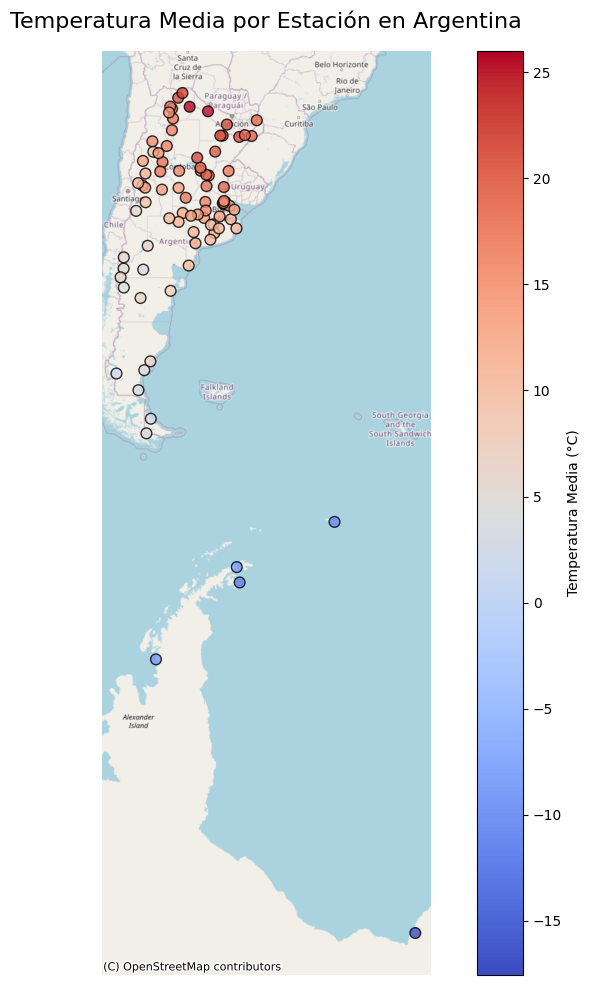

In [17]:
# --- PASO 1: AGREGAR LOS DATOS ---
# Agrupamos por estación para tener UNA fila por estación.
# Calculamos la temperatura MEDIA para cada una.
df_agregado = df_combinado.groupby(['ESTACION', "LAT", "LON"]).agg(
    TEMP_media=('TEMP (°C)', 'mean')
).reset_index()

print("--- DataFrame Agregado (una fila por estación) ---")
print(df_agregado.head())


# --- PASO 2: CREAR EL GEODATAFRAME CON LOS DATOS AGREGADOS ---
gdf_agregado = gpd.GeoDataFrame(
    df_agregado,
    geometry=gpd.points_from_xy(df_agregado.LON, df_agregado.LAT),
    crs="EPSG:4326"
)


# --- PASO 3: GRAFICAR EL NUEVO GEODATAFRAME ---
# Reproyectar al CRS correcto para el mapa base
gdf_agregado_wm = gdf_agregado.to_crs(epsg=3857)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 12))

# Graficar usando la nueva columna 'TEMP_media'
gdf_agregado_wm.plot(ax=ax,
                     column='TEMP_media', # <-- Usamos la nueva columna con el promedio
                     cmap='coolwarm',
                     legend=True,
                     legend_kwds={'label': "Temperatura Media (°C)"},
                     alpha=0.8,
                     markersize=60,
                     edgecolor='black')

# Añadir mapa de fondo
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
plt.title("Temperatura Media por Estación en Argentina", fontsize=16)
plt.show()

In [18]:
import plotly.express as px

# Asumiendo que tienes el DataFrame 'df_agregado' del paso anterior

# Creamos la figura interactiva con una sola línea de código
fig = px.scatter_mapbox(
    df_agregado,
    lat="LAT",
    lon="LON",
    color="TEMP_media",              # El tamaño de la burbuja también se basa en la temp.
    hover_name="ESTACION",            # Muestra el nombre de la estación al pasar el mouse
    hover_data={'TEMP_media': ':.2f'}, # Info extra en el hover, con 2 decimales
    color_continuous_scale=px.colors.sequential.Plasma, # Paleta de colores
    mapbox_style="open-street-map", # Estilo del mapa de fondo
    zoom=3,                         # Nivel de zoom inicial
    center={"lat": -40, "lon": -64}, # Centra el mapa en Argentina
    title="Temperatura Media por Estación en Argentina"
)

# Mostramos la figura interactiva
fig.show()

C:\Users\dsput\AppData\Local\Temp\ipykernel_16496\1165637625.py:6: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(
